In [100]:
from sklearn.decomposition import fastica # FastICA algorithm
import numpy as np # Numpy Arrays
import matplotlib.pyplot as plt # Used for plotting numpy arrays
from numpy import linalg as la # Used for finding the eigen values and vectors of a numpy array
import matplotlib.pyplot as plt # Used for graphing
import math # Using math function

N = 1000 # Amount of instances

#S = np.random.laplace(loc=0.0, scale=1.0, size=(2,N)) # Matrix consisting of a laplace random distribution from [0,1)
#S = np.random.logistic(loc=0.0, scale=1.0, size=(2,N)) # Matrix consisting of a logistic random distribution from [0,1)
S = np.random.gumbel(loc=0.0, scale=1.0, size=(2,N)) # Matrix consisting of a gumbel random distribution from [0, 1)
#S = np.random.uniform(low=-1.0, high=1.0, size=(2,N)) # Matrix consisting of a uniform random distribution from [0, 1)
print(S.shape) # 2 by N matrix dimensions

(2, 1000)


[[ 0.01010709  2.97194151  0.91423994 ...  1.72909274  0.84455327
   0.17531288]
 [ 0.30976624  0.85164482  0.64054557 ...  2.67324781 -0.95301443
   1.51058066]]


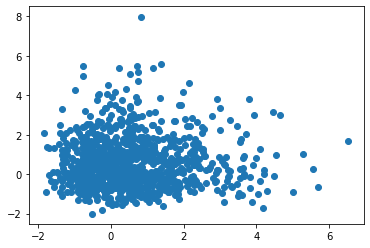

In [101]:
print(S)
plt.scatter(S[0,:], S[1,:]) # Printing the graph for S
plt.show()

(2, 2)


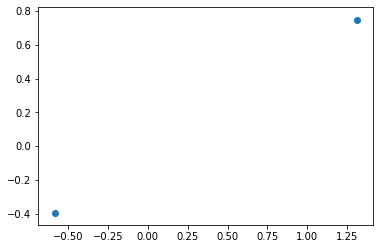

In [102]:
A = np.random.normal(loc=0.0, scale=1.0, size=(2,2)) # Matrix consisting of a 2 by 2 Matrix, the mixing matrix
print(A.shape) # 2 by 2 matrix dimensions
plt.scatter(A[0,:], A[1,:]) # Printing the matrix A
plt.show()

In [103]:
print(A)

[[ 1.30877152 -0.58048706]
 [ 0.749361   -0.3929491 ]]


In [104]:
X = np.matmul(A, S) # 2 by N matrix that we are given and need to solve for A
print(X.shape) # 2 by N

(2, 1000)


In [105]:
print(X)

[[-0.16658742  3.3952236   0.82470278 ...  0.71120156  1.65853981
  -0.64742802]
 [-0.1141485   1.89240401  0.43339396 ...  0.24526435  1.00736145
  -0.46220867]]


In [106]:
# First step: Subtract off the mean of the data in each dimension to make it a zero mean variable
X = np.subtract(X, np.mean(X)) # Subtracting the mean from every value of X
print(X)

[[-0.46220782  3.0996032   0.52908239 ...  0.41558116  1.36291941
  -0.94304842]
 [-0.4097689   1.59678361  0.13777356 ... -0.05035605  0.71174105
  -0.75782907]]


In [107]:
# Compute the Covariance of X 
covX = (1/N) * np.matmul(X, X.transpose())
print(covX.shape) # 2 by 2 Covariance Matrix
print(covX)

(2, 2)
[[3.27405393 1.91569113]
 [1.91569113 1.15253626]]


In [108]:
# Second step: Whiten the data by calculating the eigenvectors and eigenvalues of the covariance of the data
eigvals, eigvecs = la.eig(covX) # Unpacking the tuple returned
print(f'Eigen values are: {eigvals}')
print(f'Eigen vectors are: {eigvecs}')
eigVec1 = eigvecs[:,0].reshape(2,1)
eigVec2 = eigvecs[:,1].reshape(2,1)
print('EigenVector1')
print(eigVec1)
print('EigenVector2')
print(eigVec2)
E = np.concatenate((eigVec1, eigVec2), axis=1) # Creating the E matrix of corresponding eigen vectors
print('This is the E matrix')
print(E)
Einv = la.inv(E) # Create the Inverse of the eigen vector matrix
Etrans = E.transpose() # Create the Transpose matrix of the eigen vector matrix
D = np.diag(eigvals) # Create the Diagonal matrix of eigen values
print('This is the diagonal matrix of eigenvalues')
print(D)
print('This is the inverse of the E matrix')
print(Einv)
print('This is the transpose of the E matrix')
print(Etrans)
# Either Einv or Etrans can be used because they are equal
print('These matrices should be equal due to them being orthogonal')

Eigen values are: [4.40306262 0.02352756]
Eigen vectors are: [[ 0.861515   -0.50773212]
 [ 0.50773212  0.861515  ]]
EigenVector1
[[0.861515  ]
 [0.50773212]]
EigenVector2
[[-0.50773212]
 [ 0.861515  ]]
This is the E matrix
[[ 0.861515   -0.50773212]
 [ 0.50773212  0.861515  ]]
This is the diagonal matrix of eigenvalues
[[4.40306262 0.        ]
 [0.         0.02352756]]
This is the inverse of the E matrix
[[ 0.861515    0.50773212]
 [-0.50773212  0.861515  ]]
This is the transpose of the E matrix
[[ 0.861515    0.50773212]
 [-0.50773212  0.861515  ]]
These matrices should be equal due to them being orthogonal


In [109]:
# Continued... Applying the full calculation with all metadata calculated
presWhite = np.matmul(np.sqrt(la.inv(D)), Etrans)
Xwhite = np.matmul(presWhite, X)
print(Xwhite.shape) # Dimensions of Xwhite
print(Xwhite)
print((1/N) * Xwhite @ Xwhite.T) # Should be the identity

(2, 1000)
[[-0.28891867  1.6589687   0.25056119 ...  0.15843992  0.73178977
  -0.57055586]
 [-0.77154072 -1.29160299 -0.97751541 ... -1.65846149 -0.51387918
  -1.13481039]]
[[1.00000000e+00 1.73906028e-15]
 [1.76497272e-15 1.00000000e+00]]


In [110]:
# Function used to normalize the columns to unit length so they can be compared easily
def normalize_cols(A):
    norms = la.norm(A,axis=0)
    return A / np.tile(norms,(2,1))

normalize_cols(A)
print(la.norm(normalize_cols(A),axis=0))

[1. 1.]


In [111]:
# Third step: Identify final rotation matrix that optimizes statistical independence
_, W, Sest = fastica(Xwhite.T, fun='cube', whiten=False)
print('W matrix')
print(W.shape)
print(W)
print('Should be close to A')
print(normalize_cols(la.inv(W @ presWhite)))
print(normalize_cols(A))
# Recall that X = AS; ica computes K and W (whitening and de-rotating, resp.) so that 
# S = W K X => Winv S = K X => Kinv Winv S = X = AS => Kinv Winv = A => (W K)inv = A

W matrix
(2, 2)
[[ 0.25974446  0.96567739]
 [ 0.96567739 -0.25974446]]
Should be close to A
[[0.69820559 0.87132956]
 [0.7158973  0.49069827]]
[[ 0.86781678 -0.82810682]
 [ 0.49688433 -0.56057034]]


In [112]:
# Short test without the whitening matrix pre-calculated
K2, W2, Sest2 = fastica(X.T, fun='cube')
print('W2 matrix')
print(W2.shape)
print(W2)
print('Should be close to A')
print(normalize_cols(la.inv(W2 @ K2)))
print(normalize_cols(A))

W2 matrix
(2, 2)
[[-0.91487344 -0.40374076]
 [-0.40374076  0.91487344]]
Should be close to A
[[0.86738357 0.82559653]
 [0.49764017 0.56426091]]
[[ 0.86781678 -0.82810682]
 [ 0.49688433 -0.56057034]]


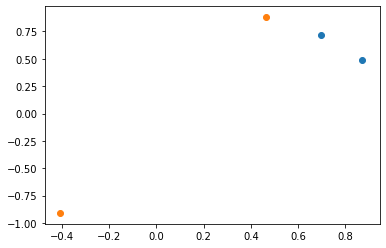

In [113]:
# Printing out the comparison between A and W * Wpres
graphW = normalize_cols(la.inv(W @ presWhite))
graphA = normalize_cols(la.inv(A))

plt.scatter(graphW[0,:], graphW[1,:])
plt.scatter(graphA[0,:], graphA[1,:])
plt.show()

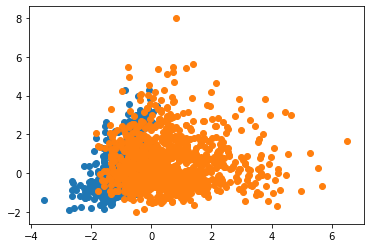

In [114]:
# Printing out the comparison between S and Sest without normalization
graphSest1 = Sest.T
graphS1 = S

plt.scatter(graphSest1[0,:], graphSest1[1,:])
plt.scatter(graphS1[0,:], graphS1[1,:])
plt.show()

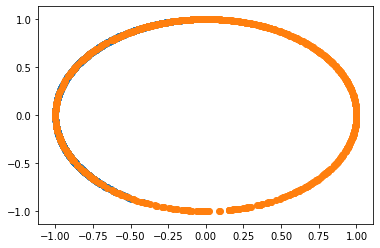

In [115]:
# Printing out the comparison between S and Sest normalized
graphSest = normalize_cols(Sest.T)
graphS = normalize_cols(S)

plt.scatter(graphSest[0,:], graphSest[1,:])
plt.scatter(graphS[0,:], graphS[1,:])
plt.show()

In [116]:
# Measuring the distance between two matrices A and W*Wpres as well as S and Sest using Frobenius norms

# calc_difference function using the frobenius distance
def calc_difference(A, B):
    first = np.subtract(A, B)
    second = np.subtract(A, B).conj().T
    inner = np.dot(first, second)
    trace = inner.trace()
    return math.sqrt(trace)

# Calculating the error difference between S and Sest
error_S = calc_difference(graphS, graphSest)
print(error_S)

48.95201240386955


In [117]:
# Calculating the error difference between A and W*Wpres
error_A = calc_difference(graphA, graphW)
print(error_A)

1.9201918703503942


In [118]:
# For a Laplace distribution, the error calculation for the A matrix is lower than with a uniform random distribution
# For a logistic distribution, the error calculation was even less for the A matrix than the laplace distribution, and the S error value was slightly higher
# For a gumbel distribution, the error calculation was the highest amonng both the A and S matrix and was fairly inaccurate
# All of these observations were made based off of the general results from the uniform random distribution